In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split


df = pd.read_csv('vgsales.csv')


In [90]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<Axes: >

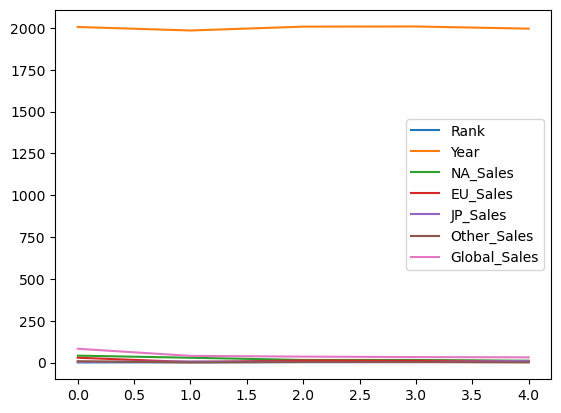

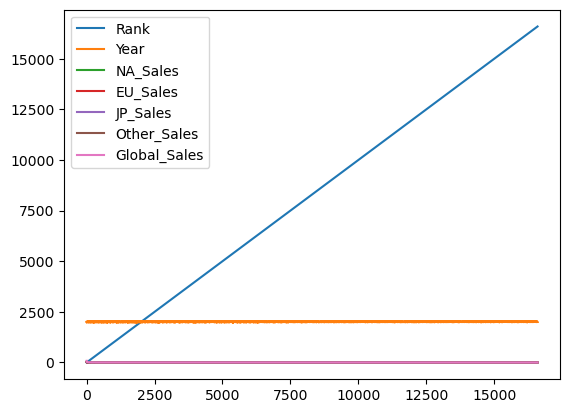

In [91]:
df.info()
df.head(5).plot()

df.plot()

Rank               Axes(0.125,0.653529;0.227941x0.226471)
Year            Axes(0.398529,0.653529;0.227941x0.226471)
NA_Sales        Axes(0.672059,0.653529;0.227941x0.226471)
EU_Sales           Axes(0.125,0.381765;0.227941x0.226471)
JP_Sales        Axes(0.398529,0.381765;0.227941x0.226471)
Other_Sales     Axes(0.672059,0.381765;0.227941x0.226471)
Global_Sales           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

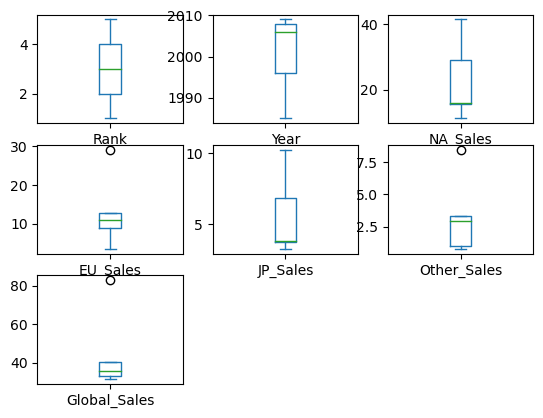

In [92]:
df.head().plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)


array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'NA_Sales'}>],
       [<Axes: title={'center': 'EU_Sales'}>,
        <Axes: title={'center': 'JP_Sales'}>,
        <Axes: title={'center': 'Other_Sales'}>],
       [<Axes: title={'center': 'Global_Sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

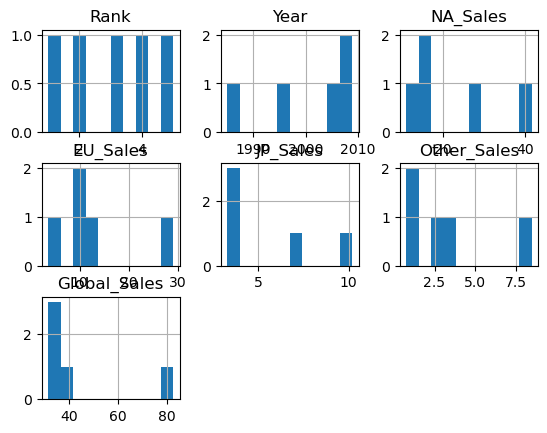

In [93]:
df.head().hist()


array([[<Axes: xlabel='Rank', ylabel='Rank'>,
        <Axes: xlabel='Year', ylabel='Rank'>,
        <Axes: xlabel='NA_Sales', ylabel='Rank'>,
        <Axes: xlabel='EU_Sales', ylabel='Rank'>,
        <Axes: xlabel='JP_Sales', ylabel='Rank'>,
        <Axes: xlabel='Other_Sales', ylabel='Rank'>,
        <Axes: xlabel='Global_Sales', ylabel='Rank'>],
       [<Axes: xlabel='Rank', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='NA_Sales', ylabel='Year'>,
        <Axes: xlabel='EU_Sales', ylabel='Year'>,
        <Axes: xlabel='JP_Sales', ylabel='Year'>,
        <Axes: xlabel='Other_Sales', ylabel='Year'>,
        <Axes: xlabel='Global_Sales', ylabel='Year'>],
       [<Axes: xlabel='Rank', ylabel='NA_Sales'>,
        <Axes: xlabel='Year', ylabel='NA_Sales'>,
        <Axes: xlabel='NA_Sales', ylabel='NA_Sales'>,
        <Axes: xlabel='EU_Sales', ylabel='NA_Sales'>,
        <Axes: xlabel='JP_Sales', ylabel='NA_Sales'>,
        <Axes: xlabel='Other_Sales', y

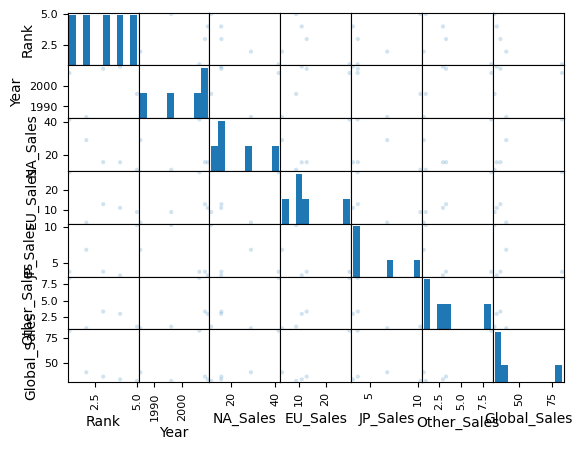

In [94]:
pd.plotting.scatter_matrix(df.head(), alpha=0.2)


In [119]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [185]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Platform'] = label_encoder.fit_transform(df['Platform'])
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])
array = df.head().values
X = df[['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Y = df['Global_Sales']
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size,random_state=seed)


In [189]:
predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.8464975759877659


In [254]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Platform'] = label_encoder.fit_transform(df['Platform'])
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])

X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Y = df['Global_Sales']

validation_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size)

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8195122341842764


In [253]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 37.45286666666667


In [ ]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('classifier', DecisionTreeClassifier())
])
pipeline.fit(X, y)

export_graphviz(pipeline.named_steps['classifier'], out_file='vgsales2.dot',
                feature_names=X.columns,
                class_names=[str(x) for x in df['Genre'].unique()],
                filled=True,
                rounded=True)